In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import data
path1 = raw_data_path + "/Imaging/mng/210804_nwg378_tom4,5,60,500"
path2 = raw_data_path + "/Imaging/mng/220826_nwg378_tom4,5,60,500"
paths = direcslist(path1) + direcslist(path2)
print(len(paths))
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

17


In [3]:
# Run calibration
iq = ImageQuant2(img=imgs, roi=rois)
iq.calibrate_cytoplasm()

  0%|                                                                                                                                 | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                        | 1/600 [00:00<06:18,  1.58it/s]

  3%|███▏                                                                                                                    | 16/600 [00:00<00:20, 28.97it/s]

  5%|██████▍                                                                                                                 | 32/600 [00:00<00:10, 55.93it/s]

  8%|█████████▊                                                                                                              | 49/600 [00:00<00:06, 81.46it/s]

 11%|█████████████▎                                                                                                         | 67/600 [00:01<00:05, 104.32it/s]

 14%|████████████████▋                                                                                                      | 84/600 [00:01<00:04, 119.76it/s]

 17%|███████████████████▋                                                                                                  | 100/600 [00:01<00:03, 130.21it/s]

 20%|███████████████████████                                                                                               | 117/600 [00:01<00:03, 140.67it/s]

 20%|████████████████████████▏                                                                                              | 122/600 [00:01<00:05, 87.39it/s]

KeyboardInterrupt: 

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

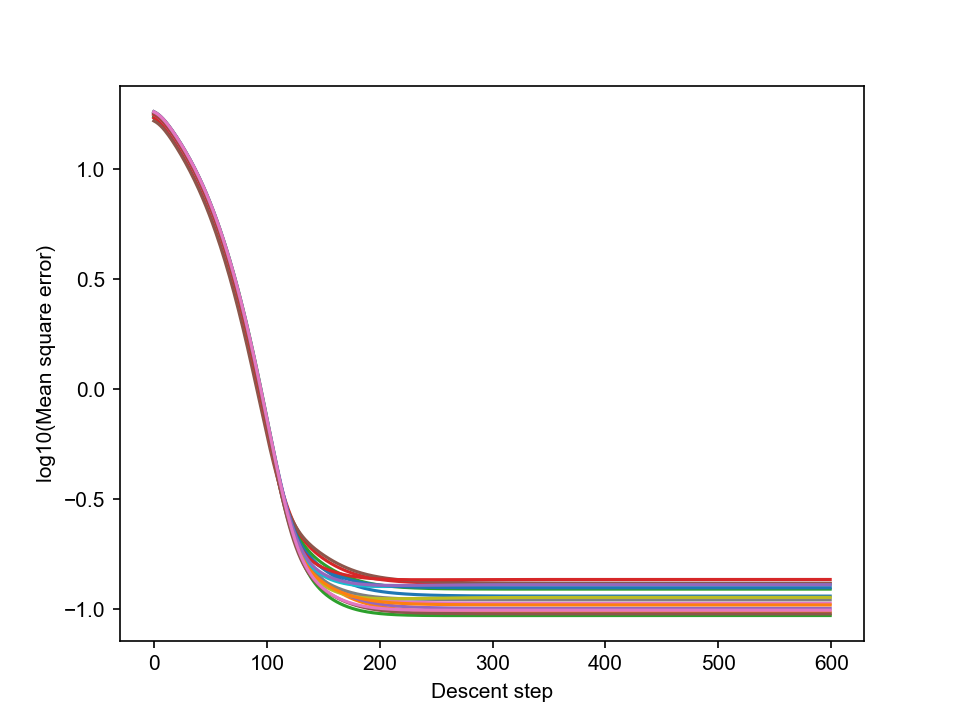

In [4]:
# Plot losses
iq.plot_losses(log=True)

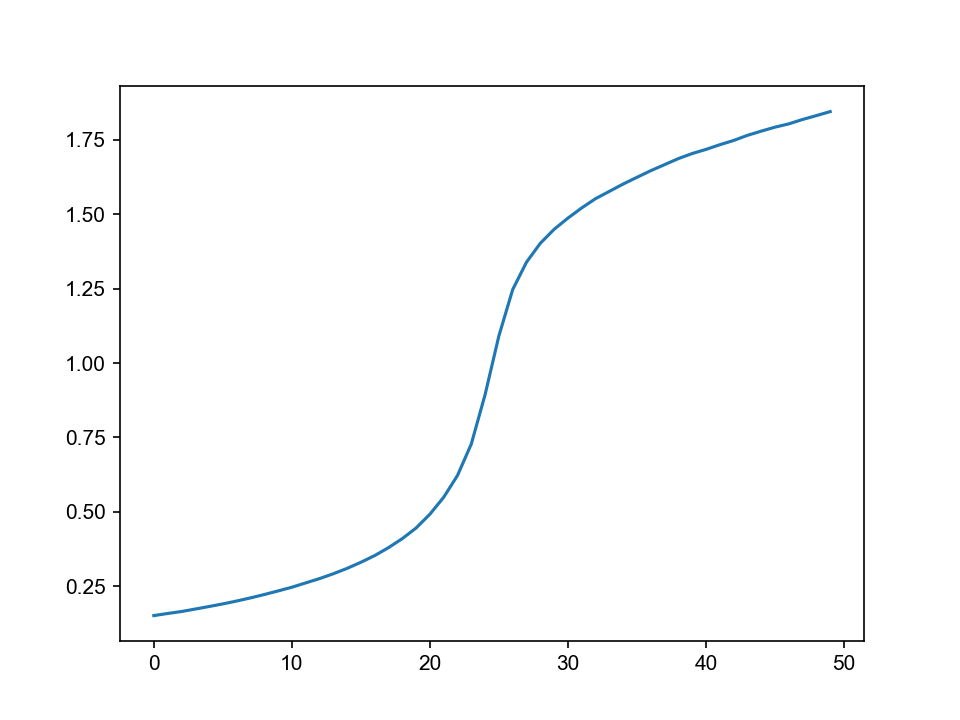

In [5]:
# Plot calibrated cytoplasmic profile
fig, ax = plt.subplots()
ax.plot(iq.cytbg)

In [6]:
# Save
np.savetxt("../../data/calibration_cyt.txt", iq.cytbg)